# Evaluación 3

Gabriel Alberto López Monge.

Departamento de Física.

Universidad de Sonora.

3 de Mayo del 2021.

## Tercera Evaluación de Física Computacional 1 (2021-1)

(3 de Mayo de 2021)

La [Ecuación de Reacción-Difusión](https://en.wikipedia.org/wiki/Reaction–diffusion_system) en una dimensión está dada por la ecuación diferencial parcial

\begin{equation*}
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + R(u)
\end{equation*}

donde $D$ es el coeficiente de difusión y $R(u)$ es una función de reacción. La forma de la función $R(u)$, puede describir una colección amplia de fenómenos físicos. 

Comúnmente la ecuación de reacción difusión se utiliza para estudiar la evolución temporal de una mezcla de componentes químicos que reaccionan entre si, por ejemplo

\begin{equation*}
2 H_2 + O_2 \xrightarrow[\leftarrow]{}  2 H_2 O
\end{equation*}

donde se mezclan 2 moleculas de Hidrógeno y una oxígeno, para formar agua, con ayuda de un catalizador que facilite la reacción.

Se pide trabajar el caso donde $R(u) = \alpha u$, 
siendo $\alpha$ el coeficiente de reacción. 

Entonces nos interesa resolver la ecuación

\begin{equation*}
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + \alpha u
\end{equation*}

Aquí $u$ denotaría la concentración del compuesto químico. Si $\alpha=0$, la ecuación anterior se reduce a una simple ecuación de difusión como la que vimos en la ecuación del calor. 

Supondremos que $D=1$ y $\alpha=-1$. 

Resuelve numéricamente la ecuación de reacción-difusión en una dimensión, para estudiar la evolución de un modelo simple de reacción-difusión de mezclar moleculas de $2 H_2$ con $O_2$
en un tubo unidimensional de longitud $L=1$ en la dirección $x$, y que inicialmente se encuentra vacío $u(x,0)=0$ como se muestra en la siguiente figura


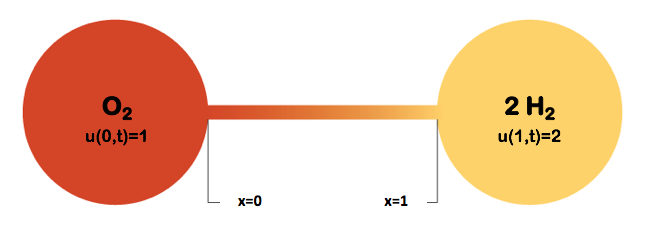

In [1]:
# Bibliotecas a usar
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

**Problema 1:** 

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

True


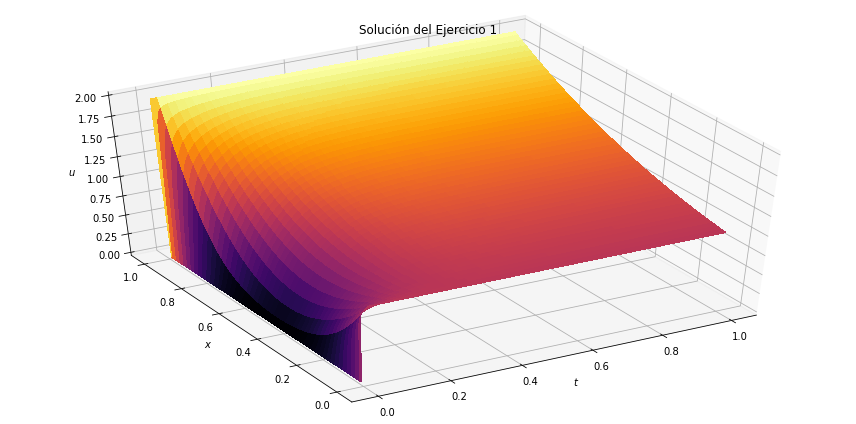

In [8]:
# Método de solución numérica para la ecuación 1-dimensional:
M=100 # Puntos en el Espacio x 
N=200 # Puntos en el Tiempo t  
# Discretización de x 
x0=0
xL=1
dx=(xL-x0)/(M-1)
# Discretización de t 
t0=0
tF=1
dt=(tF-t0)/(N-1)
# Coeficiente de Difución
D=1
# Coeficiente de Reacción
alpha=-1 
r=dt*D/dx**2
s=dt*alpha
# Malla
xspan=np.linspace(x0, xL, M)
tspan=np.linspace(t0, tF, N)
main_diag=(1+2*r-s)*np.ones((1, M-2))
off_diag=-r*np.ones((1, M-3))
a=main_diag.shape[1]
diagonals=[main_diag, off_diag, off_diag]
A=sparse.diags(diagonals, [0, -1, 1], shape=(a, a)).toarray()
# Matriz de Inicialización u
U=np.zeros((M, N))
# Condición Incial
U[:, 0]=0.0
# Condiciones de frontera de Dirichlet
U[0, :]=1.0 # Condicion de u(0, t)=1
U[-1, :]=2.0 # Condicion de u(1, t)=2 
for k in range(1, N):
  c=np.zeros((M-4, 1)).ravel()
  b=np.asarray([r*U[0, k], r*U[-1, k]])
  b1=np.insert(b, 1, c)
  b2=np.array(U[1 :M-1, k-1])
  B=b1 + b2  # Lado derecho de la igualdad
  U[1 :M-1, k]=np.linalg.solve(A, B)  # Solve x=A\B
# Verificamos si la solución es correcta
g=np.allclose(np.dot(A, U[1: M-1, N-1]), B)
print(g)
# Graficamos la Superficie
X, T=np.meshgrid(tspan, xspan)
fig=plt.figure(figsize=(12, 6))
ax=fig.gca(projection="3d")
surf=ax.plot_surface(X, T, U, linewidth=0,cmap=cm.inferno, antialiased=False)
ax.set_title("Solución del Ejercicio 1")
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
ax.set_zlabel("$u$")
plt.tight_layout()
ax.view_init(elev=45, azim=-120)

plt.show()

**Problema 2:**

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$  y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.


True


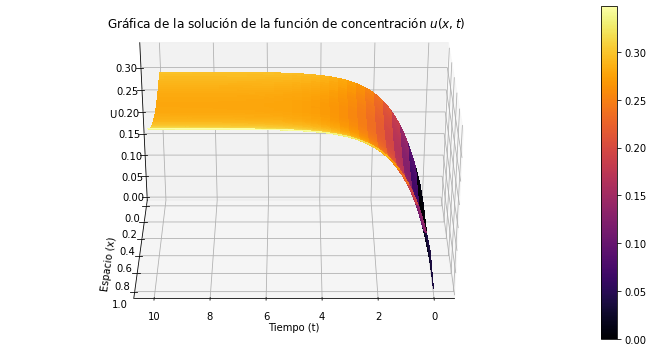

In [5]:
'''
Método de diferencias finitas hacia atrás para resolver la ecuación de
Reacción / Difusión:
u_t = D*u_xx + αu

Contando con condiciones a la frontera de tipo Neumann:
u_x(x_0,t) = f(x_0); u_x(x_L,t) = g(x_L)

Condición inicial u(x,0) = 0.

Código por el Dr. Vivi Andasari, Universidad de Boston.
'''


M = 50 # Número de pasos para el intervalo espacial
N = 60 # Número de pasos para el intervalo temporal

x0 = 0 # Inicio del intervalo en x
xL = 1 # Fin del intervalo de x. (Longitud del tubo)

# ----- Discretización espacial -----
dx = (xL - x0)/(M - 1) # Tamaño de paso espacial

t0 = 0  # Inicio del intervalo de tiempo
tF = 10 # Fin del intervalo de tiempo (tiempo de reacción)

# ----- Pasos temporales (discretización temporal)  -----
dt = (tF - t0)/(N - 1)

D = 1  # Coeficiente de difusión
alpha = -1 # Razón de reacción

r = dt*D/dx**2  # Cambios de variable para facilitación de aplicación del método
s = dt*alpha
a = 1 + 2*r - s


xspan = np.linspace(x0, xL, M)  # Vector con M puntos en x (inicio x0 a final xL)
tspan = np.linspace(t0, tF, N)  # Vector con N puntos en el tiempo (inicio t0 a final tf)

main_diag = (1 + 2*r - s)*np.ones((1,M))  # Para resolución del sistema
# de ecuaciones lineales AU = F, esta representa la diagonal principal de la matriz A
off_diag = -r*np.ones((1, M-1))  # Diagonal inferior y superior de la principal de 
# la matriz A

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r  #Declaración de la 
# matriz A como sparse matrix, con el objetivo de ahorro de memoria, eliminando 
# ceros innecesarios

# ----- Iniciar la matriz U -----
U = np.zeros((M, N))

#----- Condición inicial -----
U[:,0] = 0

#----- Condiciones a la frontera de Neumann -----
leftBC = np.arange(1, N+1)
f = 0.1*np.ones(leftBC.shape)

rightBC = np.arange(1, N+1)
g = 0.2*np.ones(rightBC.shape)

# Loop de resolución del sistema AU = F, resolver para U:
for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Verifica si la solución es correcta. En cuyo caso es TRUE:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Graficación de la superficie de solución -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.inferno, antialiased=False)

ax.view_init(elev=30,azim=90)
ax.set_title('Gráfica de la solución de la función de concentración $u(x,t)$')
m=cm.ScalarMappable(cmap='inferno')
m.set_array(U)
plt.colorbar(m)
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Espacio (x)')
ax.set_zlabel('U')
plt.tight_layout()

**Problema 3:**

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el  mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso. 

True


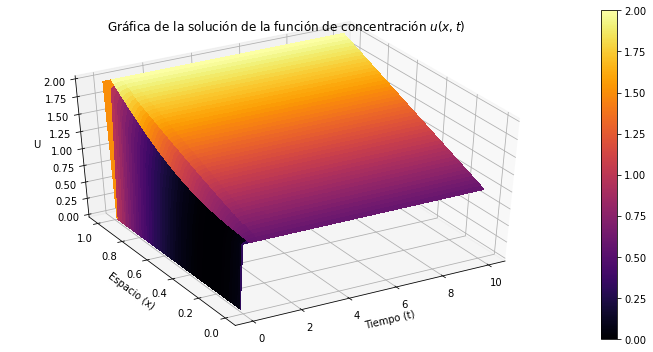

In [7]:
'''
Método de diferencias finitas hacia atrás para resolver la ecuación de
Reacción / Difusión:
u_t = D*u_xx + αu

Contando con condiciones a la frontera de tipo Dirichlet:
u(x_0,t) = f(x_0); u(x_L,t) = g(x_L)

Condición inicial u(x,0) = 0.

Código por el Dr. Vivi Andasari, Universidad de Boston.
'''

M = 50 # Número de pasos para el intervalo espacial
N = 60 # Número de pasos para el intervalo temporal

x0 = 0 # Inicio del intervalo
xL = 1 # Fin del intervalo de x. (Longitud del tubo)

# ----- Discretización espacial -----
dx = (xL - x0)/(M - 1)  # Tamaño de paso espacial

t0 = 0 # Inicio del intervalo de tiempo
tF = 10 # Fin del intervalo de tiempo (tiempo de reacción)

# ----- Pasos temporales (discretización temporal) -----
dt = (tF - t0)/(N - 1) # Tamaño de paso temporal

D = 1  # Coeficiente de difusión
alpha = 0 # Razón de reacción

r = dt*D/dx**2  # Cambios de variable para facilitación de aplicación del método
s = dt*alpha;

xspan = np.linspace(x0, xL, M)  # Vector con M puntos en x (inicio x0 a final xL)
tspan = np.linspace(t0, tF, N)  # Vector con N puntos en el tiempo (inicio t0 a final tf)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))  # Para resolución del sistema
# de ecuaciones lineales AU = F, esta representa la diagonal principal de la matriz A
off_diag = -r*np.ones((1, M-3))  # Diagonal inferior y superior de la principal de 
# la matriz A

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray() #Declaración de la 
# matriz A como sparse matrix, con el objetivo de ahorro de memoria, eliminando 
# ceros innecesarios

# ----- Inicializar matriz U -----
U = np.zeros((M, N))

#----- Condición inicial -----
U[:,0] = 0

#----- Condiciones a la frontera de Dirichlet -----
U[0,:] = 1
U[-1,:] = 2

# Loop de resolución del sistema AU = F, resolver para U:

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Si la solución es correcta, se imprime TRUE:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Gráfico de la superficie de la solución -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.inferno, antialiased=False)

ax.set_title('Gráfica de la solución de la función de concentración $u(x,t)$')
m=cm.ScalarMappable(cmap='inferno')
m.set_array(U)
plt.colorbar(m)
ax.view_init(40,-120)
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Espacio (x)')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()